# ランダムグラフ生成

対応する動画：[【研究で使うPython】#14 NetworkXによるネットワーク分析　⑦ランダムグラフの生成](https://youtu.be/GgCn92_vb40)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## NetworkXの組み込み関数より生成

NetworkX.erdos_renyi_graph()
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 250
Average degree:   5.0000


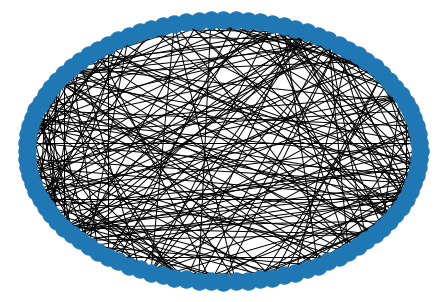

In [7]:
n = 100
p = 0.05

print('NetworkX.erdos_renyi_graph()')
G1 = nx.erdos_renyi_graph(n, p)
pos = nx.circular_layout(G1)
print(nx.info(G1))
nx.draw(G1, pos)
plt.show()

## 自作関数で生成

自作関数による生成
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 245
Average degree:   4.9000


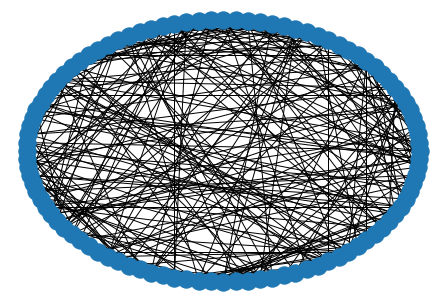

In [9]:
# 自作のランダムグラフ生成関数
def gen_ER_network(n, p, seed=None):
    if seed is not None:
        np.random.seed(seed=seed)
    
    # n個のノードを追加
    G = nx.Graph()
    G.add_nodes_from(list(range(n)))
    
    t = []
    
    for i in range(n):
        for j in range(i+1, n):
            if np.random.rand() < p:
                t.append((i,j))
    
    G.add_edges_from(t)
    return G

n = 100
p = 0.05

print('自作関数による生成')

G2 = gen_ER_network(n, p)
pos = nx.circular_layout(G2)
print(nx.info(G2))
nx.draw(G2, pos)
plt.show()

## 最大クラスタサイズ

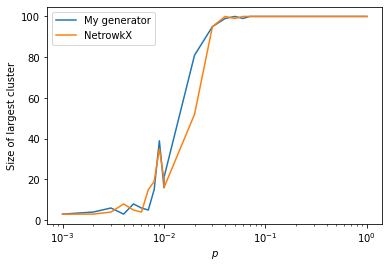

In [16]:
def calc_size_of_GC(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    return len(G0)

tmp = np.array(range(1,11))
parray = np.zeros(30)
parray[0:10]  = tmp/1000
parray[10:20] = tmp/100
parray[20:30] = tmp/10

result1 = []
result2 = []

for p in parray:
    G1 = gen_ER_network(n, p)
    result1.append(calc_size_of_GC(G1))
    G2 = nx.erdos_renyi_graph(n, p)
    result2.append(calc_size_of_GC(G2))
    
plt.plot(parray, result1, label='My generator')
plt.plot(parray, result2, label='NetrowkX')
plt.xlabel('$p$')
plt.ylabel('Size of largest cluster')
plt.xscale('log')
plt.legend()
plt.show()